<a href="https://colab.research.google.com/github/MuhammadaliMS/Disaster-Tweet/blob/master/Disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [43]:
path = "/content/drive/My Drive/Data/nlp-getting-started/train.csv"
path1 = "/content/drive/My Drive/Data/nlp-getting-started/test.csv"
path2 ="/content/drive/My Drive/Data/nlp-getting-started/sample_submission.csv"

In [6]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [7]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-arrhlpto
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-arrhlpto
     |████████████████████████████████| 3.0MB 4.8MB/s 
     |████████████████████████████████| 1.1MB 54.7MB/s 
     |████████████████████████████████| 890kB 58.2MB/s 
  Created wheel for transformers: filename=transformers-3.0.2-cp36-none-any.whl size=799927 sha256=fe32175d715fabcb1d88998d210a2fcd61932a52ef03db00f87de5b14466dbfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-xzo79erw/wheels/70/d3/52/b3fa4f8b8ef04167ac62e5bb2accb62ae764db2a378247490e
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=4c6dacd6a654282ec5296caf82e8932a311c696a53e6a3df67f41946af45c3fe
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built transformers sacremoses


In [8]:
!git clone https://github.com/huggingface/transformers

Cloning into 'transformers'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 35899 (delta 8), reused 9 (delta 4), pack-reused 35881
Receiving objects: 100% (35899/35899), 26.04 MiB | 28.42 MiB/s, done.
Resolving deltas: 100% (24761/24761), done.


In [9]:
!pip install transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import plotly.express as px
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

SEED = 1337

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


In [11]:
train = pd.read_csv(path)
test = pd.read_csv(path1)
print(train.shape)
train.tail()

(7613, 5)


,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [14]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [15]:
train.groupby('target').count()

,id,keyword,location,text
target,,,,
0,4342,4323,2884,4342
1,3271,3229,2196,3271


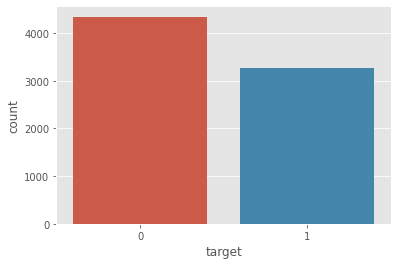

In [16]:
sns.countplot(x='target',data =train)

In [17]:
 train[train['target']==0]['text'].apply(lambda x: str(x).split())

15                                     [What's, up, man?]
16                                      [I, love, fruits]
17                                   [Summer, is, lovely]
18                                [My, car, is, so, fast]
19                       [What, a, goooooooaaaaaal!!!!!!]
                              ...                        
7581    [@engineshed, Great, atmosphere, at, the, Brit...
7582    [Cramer:, Iger's, 3, words, that, wrecked, Dis...
7584    [These, boxes, are, ready, to, explode!, Explo...
7587                                [Sirens, everywhere!]
7593    [I, just, heard, a, really, loud, bang, and, e...
Name: text, Length: 4342, dtype: object

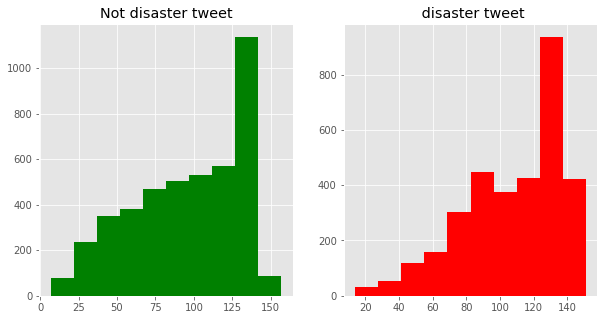

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
not_disaster_length = train[train['target']==0]['text'].str.len()
ax1.hist(not_disaster_length, color ='green')
ax1.set_title('Not disaster tweet')
disaster_length= train[train['target']==1]['text'].str.len()
ax2.hist(disaster_length, color ='red')
ax2.set_title(' disaster tweet')
plt.show()

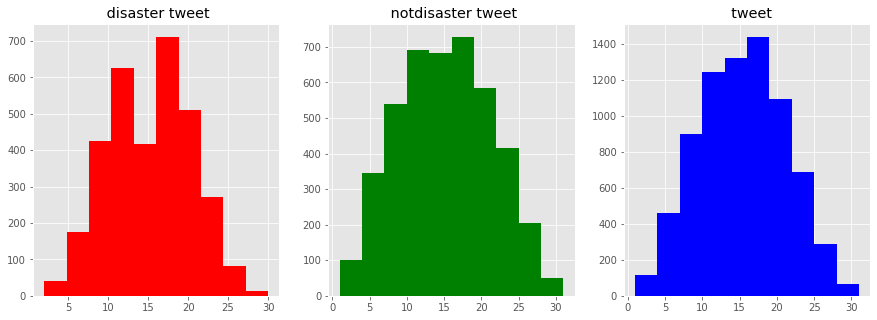

In [19]:
#number of words in tweet 

fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,5))

dis_tweetlen = train[train['target']==1]['text'].apply(lambda x: len(str(x).split()))
ax1.hist(dis_tweetlen, color = 'red')
ax1.set_title(' disaster tweet')

notdis_tweetlen = train[train['target']==0]['text'].apply(lambda x: len(str(x).split()))
ax2.hist(notdis_tweetlen, color = 'green')
ax2.set_title(' notdisaster tweet')
tweetlen = train['text'].apply(lambda x: len(str(x).split()))
ax3.hist(tweetlen, color = 'blue')
ax3.set_title('  tweet')
plt.show()

In [20]:

#most common words
notdis= train[train['target']==0]['text'].apply(lambda x: str(x).split())
top =Counter([item for sublist in notdis for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['common_words', 'count'] 
fig = px.bar(temp, x ='count', y = 'common_words', orientation ='h')
fig.show()


In [21]:
#most common words
dis= train[train['target']==1]['text'].apply(lambda x: str(x).split())
top =Counter([item for sublist in dis for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['common_words', 'count'] 
fig = px.bar(temp, x ='count', y = 'common_words', orientation ='h')
fig.show()

In [22]:
#get bigrams. 
def get_top_tweet_bigrams (corpus,n=None):
  vec = CountVectorizer(ngram_range =(2,2)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]


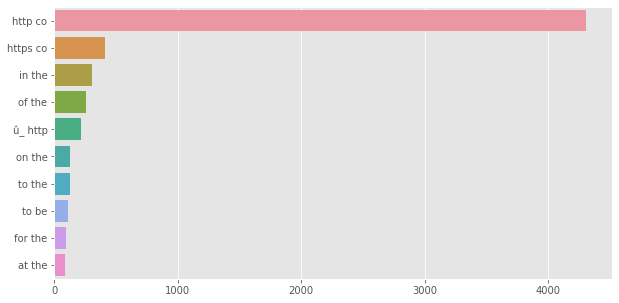

In [23]:
plt.figure(figsize=(10,5))
top_bigrams = get_top_tweet_bigrams(train['text'])[:10]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x)

In [24]:
#We have to clean the data since the bigrams shows that there are many links
# hashtags in the text which might hinder our analysis 


def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub("["
                  u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",'', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    # Contractions
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"We're", "We are", text)
    text = re.sub(r"That's", "That is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"Can't", "Cannot", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"don\x89Ûªt", "do not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"There's", "There is", text)
    text = re.sub(r"He's", "He is", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"You're", "You are", text)
    text = re.sub(r"I'M", "I am", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"i'm", "I am", text)
    text = re.sub(r"I\x89Ûªm", "I am", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"Isn't", "is not", text)
    text = re.sub(r"Here's", "Here is", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"you\x89Ûªve", "you have", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"it\x89Ûªs", "it is", text)
    text = re.sub(r"doesn\x89Ûªt", "does not", text)
    text = re.sub(r"It\x89Ûªs", "It is", text)
    text = re.sub(r"Here\x89Ûªs", "Here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"I\x89Ûªve", "I have", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"can\x89Ûªt", "cannot", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"We've", "We have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"Y'all", "You all", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"Didn't", "Did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"DON'T", "DO NOT", text)
    text = re.sub(r"That\x89Ûªs", "That is", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"You\x89Ûªre", "You are", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"Don\x89Ûªt", "Do not", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"They're", "They are", text)
    text = re.sub(r"Can\x89Ûªt", "Cannot", text)
    text = re.sub(r"you\x89Ûªll", "you will", text)
    text = re.sub(r"I\x89Ûªd", "I would", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"I've", "I have", text)
    text = re.sub(r"Don't", "do not", text)
    text = re.sub(r"I'll", "I will", text)
    text = re.sub(r"I'd", "I would", text)
    text = re.sub(r"Let's", "Let us", text)
    text = re.sub(r"you'd", "You would", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"Ain't", "am not", text)
    text = re.sub(r"Haven't", "Have not", text)
    text = re.sub(r"Could've", "Could have", text)
    text = re.sub(r"youve", "you have", text)  
    text = re.sub(r"donå«t", "do not", text)   
            
    # Character entity references
    text = re.sub(r"&gt;", ">", text)
    text = re.sub(r"&lt;", "<", text)
    text = re.sub(r"&amp;", "&", text)
    
    # Typos, slang and informal abbreviations
    text = re.sub(r"w/e", "whatever", text)
    text = re.sub(r"w/", "with", text)
    text = re.sub(r"USAgov", "USA government", text)
    text = re.sub(r"recentlu", "recently", text)
    text = re.sub(r"Ph0tos", "Photos", text)
    text = re.sub(r"amirite", "am I right", text)
    text = re.sub(r"exp0sed", "exposed", text)
    text = re.sub(r"<3", "love", text)
    text = re.sub(r"amageddon", "armageddon", text)
    text = re.sub(r"Trfc", "Traffic", text)
    text = re.sub(r"8/5/2015", "2015-08-05", text)
    text = re.sub(r"WindStorm", "Wind Storm", text)
    text = re.sub(r"8/6/2015", "2015-08-06", text)
    text = re.sub(r"10:38PM", "10:38 PM", text)
    text = re.sub(r"10:30pm", "10:30 PM", text)
    text = re.sub(r"16yr", "16 year", text)
    text = re.sub(r"lmao", "laughing my ass off", text)   
    text = re.sub(r"TRAUMATISED", "traumatized", text)
    
    # Hashtags and usernames
    text = re.sub(r"IranDeal", "Iran Deal", text)
    text = re.sub(r"ArianaGrande", "Ariana Grande", text)
    text = re.sub(r"camilacabello97", "camila cabello", text) 
    text = re.sub(r"RondaRousey", "Ronda Rousey", text)     
    text = re.sub(r"MTVHottest", "MTV Hottest", text)
    text = re.sub(r"TrapMusic", "Trap Music", text)
    text = re.sub(r"ProphetMuhammad", "Prophet Muhammad", text)
    text = re.sub(r"PantherAttack", "Panther Attack", text)
    text = re.sub(r"StrategicPatience", "Strategic Patience", text)
    text = re.sub(r"socialnews", "social news", text)
    text = re.sub(r"NASAHurricane", "NASA Hurricane", text)
    text = re.sub(r"onlinecommunities", "online communities", text)
    text = re.sub(r"humanconsumption", "human consumption", text)
    text = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", text)
    text = re.sub(r"Meat-Loving", "Meat Loving", text)
    text = re.sub(r"facialabuse", "facial abuse", text)
    text = re.sub(r"LakeCounty", "Lake County", text)
    text = re.sub(r"BeingAuthor", "Being Author", text)
    text = re.sub(r"withheavenly", "with heavenly", text)
    text = re.sub(r"thankU", "thank you", text)
    text = re.sub(r"iTunesMusic", "iTunes Music", text)
    text = re.sub(r"OffensiveContent", "Offensive Content", text)
    text = re.sub(r"WorstSummerJob", "Worst Summer Job", text)
    text = re.sub(r"HarryBeCareful", "Harry Be Careful", text)
    text = re.sub(r"NASASolarSystem", "NASA Solar System", text)
    text = re.sub(r"animalrescue", "animal rescue", text)
    text = re.sub(r"KurtSchlichter", "Kurt Schlichter", text)
    text = re.sub(r"aRmageddon", "armageddon", text)
    text = re.sub(r"Throwingknifes", "Throwing knives", text)
    text = re.sub(r"GodsLove", "God's Love", text)
    text = re.sub(r"bookboost", "book boost", text)
    text = re.sub(r"ibooklove", "I book love", text)
    text = re.sub(r"NestleIndia", "Nestle India", text)
    text = re.sub(r"realDonaldTrump", "Donald Trump", text)
    text = re.sub(r"DavidVonderhaar", "David Vonderhaar", text)
    text = re.sub(r"CecilTheLion", "Cecil The Lion", text)
    text = re.sub(r"weathernetwork", "weather network", text)
    text = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", text)
    text = re.sub(r"Hostage&2", "Hostage & 2", text)
    text = re.sub(r"GOPDebate", "GOP Debate", text)
    text = re.sub(r"RickPerry", "Rick Perry", text)
    text = re.sub(r"frontpage", "front page", text)
    text = re.sub(r"NewsInTexts", "News In Texts", text)
    text = re.sub(r"ViralSpell", "Viral Spell", text)
    text = re.sub(r"til_now", "until now", text)
    text = re.sub(r"volcanoinRussia", "volcano in Russia", text)
    text = re.sub(r"ZippedNews", "Zipped News", text)
    text = re.sub(r"MicheleBachman", "Michele Bachman", text)
    text = re.sub(r"53inch", "53 inch", text)
    text = re.sub(r"KerrickTrial", "Kerrick Trial", text)
    text = re.sub(r"abstorm", "Alberta Storm", text)
    text = re.sub(r"Beyhive", "Beyonce hive", text)
    text = re.sub(r"IDFire", "Idaho Fire", text)
    text = re.sub(r"DETECTADO", "Detected", text)
    text = re.sub(r"RockyFire", "Rocky Fire", text)
    text = re.sub(r"Listen/Buy", "Listen / Buy", text)
    text = re.sub(r"NickCannon", "Nick Cannon", text)
    text = re.sub(r"FaroeIslands", "Faroe Islands", text)
    text = re.sub(r"yycstorm", "Calgary Storm", text)
    text = re.sub(r"IDPs:", "Internally Displaced People :", text)
    text = re.sub(r"ArtistsUnited", "Artists United", text)
    text = re.sub(r"ClaytonBryant", "Clayton Bryant", text)
    text = re.sub(r"jimmyfallon", "jimmy fallon", text)
    text = re.sub(r"justinbieber", "justin bieber", text)  
    text = re.sub(r"UTC2015", "UTC 2015", text)
    text = re.sub(r"Time2015", "Time 2015", text)
    text = re.sub(r"djicemoon", "dj icemoon", text)
    text = re.sub(r"LivingSafely", "Living Safely", text)
    text = re.sub(r"FIFA16", "Fifa 2016", text)
    text = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", text)
    text = re.sub(r"bbcnews", "bbc news", text)
    text = re.sub(r"UndergroundRailraod", "Underground Railraod", text)
    text = re.sub(r"c4news", "c4 news", text)
    text = re.sub(r"OBLITERATION", "obliteration", text)
    text = re.sub(r"MUDSLIDE", "mudslide", text)
    text = re.sub(r"NoSurrender", "No Surrender", text)
    text = re.sub(r"NotExplained", "Not Explained", text)
    text = re.sub(r"greatbritishbakeoff", "great british bake off", text)
    text = re.sub(r"LondonFire", "London Fire", text)
    text = re.sub(r"KOTAWeather", "KOTA Weather", text)
    text = re.sub(r"LuchaUnderground", "Lucha Underground", text)
    text = re.sub(r"KOIN6News", "KOIN 6 News", text)
    text = re.sub(r"LiveOnK2", "Live On K2", text)
    text = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", text)
    text = re.sub(r"nikeplus", "nike plus", text)
    text = re.sub(r"david_cameron", "David Cameron", text)
    text = re.sub(r"peterjukes", "Peter Jukes", text)
    text = re.sub(r"JamesMelville", "James Melville", text)
    text = re.sub(r"megynkelly", "Megyn Kelly", text)
    text = re.sub(r"cnewslive", "C News Live", text)
    text = re.sub(r"JamaicaObserver", "Jamaica Observer", text)
    text = re.sub(r"TextLikeItsSeptember11th2001", "Text like it is september 11th 2001", text)
    text = re.sub(r"cbplawyers", "cbp lawyers", text)
    text = re.sub(r"fewmoretexts", "few more texts", text)
    text = re.sub(r"BlackLivesMatter", "Black Lives Matter", text)
    text = re.sub(r"cjoyner", "Chris Joyner", text)
    text = re.sub(r"ENGvAUS", "England vs Australia", text)
    text = re.sub(r"ScottWalker", "Scott Walker", text)
    text = re.sub(r"MikeParrActor", "Michael Parr", text)
    text = re.sub(r"4PlayThursdays", "Foreplay Thursdays", text)
    text = re.sub(r"TGF2015", "Tontitown Grape Festival", text)
    text = re.sub(r"realmandyrain", "Mandy Rain", text)
    text = re.sub(r"GraysonDolan", "Grayson Dolan", text)
    text = re.sub(r"ApolloBrown", "Apollo Brown", text)
    text = re.sub(r"saddlebrooke", "Saddlebrooke", text)
    text = re.sub(r"TontitownGrape", "Tontitown Grape", text)
    text = re.sub(r"AbbsWinston", "Abbs Winston", text)
    text = re.sub(r"ShaunKing", "Shaun King", text)
    text = re.sub(r"MeekMill", "Meek Mill", text)
    text = re.sub(r"TornadoGiveaway", "Tornado Giveaway", text)
    text = re.sub(r"GRupdates", "GR updates", text)
    text = re.sub(r"SouthDowns", "South Downs", text)
    text = re.sub(r"braininjury", "brain injury", text)
    text = re.sub(r"auspol", "Australian politics", text)
    text = re.sub(r"PlannedParenthood", "Planned Parenthood", text)
    text = re.sub(r"calgaryweather", "Calgary Weather", text)
    text = re.sub(r"weallheartonedirection", "we all heart one direction", text)
    text = re.sub(r"edsheeran", "Ed Sheeran", text)
    text = re.sub(r"TrueHeroes", "True Heroes", text)
    text = re.sub(r"S3XLEAK", "sex leak", text)
    text = re.sub(r"ComplexMag", "Complex Magazine", text)
    text = re.sub(r"TheAdvocateMag", "The Advocate Magazine", text)
    text = re.sub(r"CityofCalgary", "City of Calgary", text)
    text = re.sub(r"EbolaOutbreak", "Ebola Outbreak", text)
    text = re.sub(r"SummerFate", "Summer Fate", text)
    text = re.sub(r"RAmag", "Royal Academy Magazine", text)
    text = re.sub(r"offers2go", "offers to go", text)
    text = re.sub(r"foodscare", "food scare", text)
    text = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", text)
    text = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", text)
    text = re.sub(r"GamerGate", "Gamer Gate", text)
    text = re.sub(r"IHHen", "Humanitarian Relief", text)
    text = re.sub(r"spinningbot", "spinning bot", text)
    text = re.sub(r"ModiMinistry", "Modi Ministry", text)
    text = re.sub(r"TAXIWAYS", "taxi ways", text)
    text = re.sub(r"Calum5SOS", "Calum Hood", text)
    text = re.sub(r"po_st", "po.st", text)
    text = re.sub(r"scoopit", "scoop.it", text)
    text = re.sub(r"UltimaLucha", "Ultima Lucha", text)
    text = re.sub(r"JonathanFerrell", "Jonathan Ferrell", text)
    text = re.sub(r"aria_ahrary", "Aria Ahrary", text)
    text = re.sub(r"rapidcity", "Rapid City", text)
    text = re.sub(r"OutBid", "outbid", text)
    text = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", text)
    text = re.sub(r"EudryLantiqua", "Eudry Lantiqua", text)
    text = re.sub(r"15PM", "15 PM", text)
    text = re.sub(r"OriginalFunko", "Funko", text)
    text = re.sub(r"rightwaystan", "Richard Tan", text)
    text = re.sub(r"CindyNoonan", "Cindy Noonan", text)
    text = re.sub(r"RT_America", "RT America", text)
    text = re.sub(r"narendramodi", "Narendra Modi", text)
    text = re.sub(r"BakeOffFriends", "Bake Off Friends", text)
    text = re.sub(r"TeamHendrick", "Hendrick Motorsports", text)
    text = re.sub(r"alexbelloli", "Alex Belloli", text)
    text = re.sub(r"itsjustinstuart", "Justin Stuart", text)
    text = re.sub(r"gunsense", "gun sense", text)
    text = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", text)
    text = re.sub(r"RoyalCarribean", "Royal Carribean", text)
    text = re.sub(r"samanthaturne19", "Samantha Turner", text)
    text = re.sub(r"JonVoyage", "Jon Stewart", text)
    text = re.sub(r"renew911health", "renew 911 health", text)
    text = re.sub(r"SuryaRay", "Surya Ray", text)
    text = re.sub(r"pattonoswalt", "Patton Oswalt", text)
    text = re.sub(r"minhazmerchant", "Minhaz Merchant", text)
    text = re.sub(r"TLVFaces", "Israel Diaspora Coalition", text)
    text = re.sub(r"pmarca", "Marc Andreessen", text)
    text = re.sub(r"pdx911", "Portland Police", text)
    text = re.sub(r"jamaicaplain", "Jamaica Plain", text)
    text = re.sub(r"Japton", "Arkansas", text)
    text = re.sub(r"RouteComplex", "Route Complex", text)
    text = re.sub(r"INSubcontinent", "Indian Subcontinent", text)
    text = re.sub(r"NJTurnpike", "New Jersey Turnpike", text)
    text = re.sub(r"Politifiact", "PolitiFact", text)
    text = re.sub(r"Hiroshima70", "Hiroshima", text)
    text = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", text)
    text = re.sub(r"versethe", "verse the", text)
    text = re.sub(r"TubeStrike", "Tube Strike", text)
    text = re.sub(r"MissionHills", "Mission Hills", text)
    text = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", text)
    text = re.sub(r"NANKANA", "Nankana", text)
    text = re.sub(r"SAHIB", "Sahib", text)
    text = re.sub(r"PAKPATTAN", "Pakpattan", text)
    text = re.sub(r"Newz_Sacramento", "News Sacramento", text)
    text = re.sub(r"gofundme", "go fund me", text)
    text = re.sub(r"pmharper", "Stephen Harper", text)
    text = re.sub(r"IvanBerroa", "Ivan Berroa", text)
    text = re.sub(r"LosDelSonido", "Los Del Sonido", text)
    text = re.sub(r"bancodeseries", "banco de series", text)
    text = re.sub(r"timkaine", "Tim Kaine", text)
    text = re.sub(r"IdentityTheft", "Identity Theft", text)
    text = re.sub(r"AllLivesMatter", "All Lives Matter", text)
    text = re.sub(r"mishacollins", "Misha Collins", text)
    text = re.sub(r"BillNeelyNBC", "Bill Neely", text)
    text = re.sub(r"BeClearOnCancer", "be clear on cancer", text)
    text = re.sub(r"Kowing", "Knowing", text)
    text = re.sub(r"ScreamQueens", "Scream Queens", text)
    text = re.sub(r"AskCharley", "Ask Charley", text)
    text = re.sub(r"BlizzHeroes", "Heroes of the Storm", text)
    text = re.sub(r"BradleyBrad47", "Bradley Brad", text)
    text = re.sub(r"HannaPH", "Typhoon Hanna", text)
    text = re.sub(r"meinlcymbals", "MEINL Cymbals", text)
    text = re.sub(r"Ptbo", "Peterborough", text)
    text = re.sub(r"cnnbrk", "CNN Breaking News", text)
    text = re.sub(r"IndianNews", "Indian News", text)
    text = re.sub(r"savebees", "save bees", text)
    text = re.sub(r"GreenHarvard", "Green Harvard", text)
    text = re.sub(r"StandwithPP", "Stand with planned parenthood", text)
    text = re.sub(r"hermancranston", "Herman Cranston", text)
    text = re.sub(r"WMUR9", "WMUR-TV", text)
    text = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", text)
    text = re.sub(r"ameenshaikh3", "Ameen Shaikh", text)
    text = re.sub(r"ProSyn", "Project Syndicate", text)
    text = re.sub(r"Daesh", "ISIS", text)
    text = re.sub(r"s2g", "swear to god", text)
    text = re.sub(r"listenlive", "listen live", text)
    text = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", text)
    text = re.sub(r"FoxNew", "Fox News", text)
    text = re.sub(r"CBSBigBrother", "Big Brother", text)
    text = re.sub(r"JulieDiCaro", "Julie DiCaro", text)
    text = re.sub(r"theadvocatemag", "The Advocate Magazine", text)
    text = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", text)
    text = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", text)
    text = re.sub(r"Popularmmos", "Popular MMOs", text)
    text = re.sub(r"WildHorses", "Wild Horses", text)
    text = re.sub(r"FantasticFour", "Fantastic Four", text)
    text = re.sub(r"HORNDALE", "Horndale", text)
    text = re.sub(r"PINER", "Piner", text)
    text = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", text)
    text = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", text)
    text = re.sub(r"residualincome", "residual income", text)
    text = re.sub(r"YahooNewsDigest", "Yahoo News Digest", text)
    text = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", text)
    text = re.sub(r"AmazonDeals", "Amazon Deals", text)
    text = re.sub(r"MissCharleyWebb", "Charley Webb", text)
    text = re.sub(r"shoalstraffic", "shoals traffic", text)
    text = re.sub(r"GeorgeFoster72", "George Foster", text)
    text = re.sub(r"pop2015", "pop 2015", text)
    text = re.sub(r"_PokemonCards_", "Pokemon Cards", text)
    text = re.sub(r"DianneG", "Dianne Gallagher", text)
    text = re.sub(r"KashmirConflict", "Kashmir Conflict", text)
    text = re.sub(r"BritishBakeOff", "British Bake Off", text)
    text = re.sub(r"FreeKashmir", "Free Kashmir", text)
    text = re.sub(r"mattmosley", "Matt Mosley", text)
    text = re.sub(r"BishopFred", "Bishop Fred", text)
    text = re.sub(r"EndConflict", "End Conflict", text)
    text = re.sub(r"EndOccupation", "End Occupation", text)
    text = re.sub(r"UNHEALED", "unhealed", text)
    text = re.sub(r"CharlesDagnall", "Charles Dagnall", text)
    text = re.sub(r"Latestnews", "Latest news", text)
    text = re.sub(r"KindleCountdown", "Kindle Countdown", text)
    text = re.sub(r"NoMoreHandouts", "No More Handouts", text)
    text = re.sub(r"datingtips", "dating tips", text)
    text = re.sub(r"charlesadler", "Charles Adler", text)
    text = re.sub(r"twia", "Texas Windstorm Insurance Association", text)
    text = re.sub(r"txlege", "Texas Legislature", text)
    text = re.sub(r"WindstormInsurer", "Windstorm Insurer", text)
    text = re.sub(r"Newss", "News", text)
    text = re.sub(r"hempoil", "hemp oil", text)
    text = re.sub(r"CommoditiesAre", "Commodities are", text)
    text = re.sub(r"tubestrike", "tube strike", text)
    text = re.sub(r"JoeNBC", "Joe Scarborough", text)
    text = re.sub(r"LiteraryCakes", "Literary Cakes", text)
    text = re.sub(r"TI5", "The International 5", text)
    text = re.sub(r"thehill", "the hill", text)
    text = re.sub(r"3others", "3 others", text)
    text = re.sub(r"stighefootball", "Sam Tighe", text)
    text = re.sub(r"whatstheimportantvideo", "what is the important video", text)
    text = re.sub(r"ClaudioMeloni", "Claudio Meloni", text)
    text = re.sub(r"DukeSkywalker", "Duke Skywalker", text)
    text = re.sub(r"carsonmwr", "Fort Carson", text)
    text = re.sub(r"offdishduty", "off dish duty", text)
    text = re.sub(r"andword", "and word", text)
    text = re.sub(r"rhodeisland", "Rhode Island", text)
    text = re.sub(r"easternoregon", "Eastern Oregon", text)
    text = re.sub(r"WAwildfire", "Washington Wildfire", text)
    text = re.sub(r"fingerrockfire", "Finger Rock Fire", text)
    text = re.sub(r"57am", "57 am", text)
    text = re.sub(r"fingerrockfire", "Finger Rock Fire", text)
    text = re.sub(r"JacobHoggard", "Jacob Hoggard", text)
    text = re.sub(r"newnewnew", "new new new", text)
    text = re.sub(r"under50", "under 50", text)
    text = re.sub(r"getitbeforeitsgone", "get it before it is gone", text)
    text = re.sub(r"freshoutofthebox", "fresh out of the box", text)
    text = re.sub(r"amwriting", "am writing", text)
    text = re.sub(r"Bokoharm", "Boko Haram", text)
    text = re.sub(r"Nowlike", "Now like", text)
    text = re.sub(r"seasonfrom", "season from", text)
    text = re.sub(r"epicente", "epicenter", text)
    text = re.sub(r"epicenterr", "epicenter", text)
    text = re.sub(r"sicklife", "sick life", text)
    text = re.sub(r"yycweather", "Calgary Weather", text)
    text = re.sub(r"calgarysun", "Calgary Sun", text)
    text = re.sub(r"approachng", "approaching", text)
    text = re.sub(r"evng", "evening", text)
    text = re.sub(r"Sumthng", "something", text)
    text = re.sub(r"EllenPompeo", "Ellen Pompeo", text)
    text = re.sub(r"shondarhimes", "Shonda Rhimes", text)
    text = re.sub(r"ABCNetwork", "ABC Network", text)
    text = re.sub(r"SushmaSwaraj", "Sushma Swaraj", text)
    text = re.sub(r"pray4japan", "Pray for Japan", text)
    text = re.sub(r"hope4japan", "Hope for Japan", text)
    text = re.sub(r"Illusionimagess", "Illusion images", text)
    text = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", text)
    text = re.sub(r"ShallWeDance", "Shall We Dance", text)
    text = re.sub(r"TCMParty", "TCM Party", text)
    text = re.sub(r"marijuananews", "marijuana news", text)
    text = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", text)
    text = re.sub(r"Beingtexts", "Being texts", text)
    text = re.sub(r"newauthors", "new authors", text)
    text = re.sub(r"remedyyyy", "remedy", text)
    text = re.sub(r"44PM", "44 PM", text)
    text = re.sub(r"HeadlinesApp", "Headlines App", text)
    text = re.sub(r"40PM", "40 PM", text)
    text = re.sub(r"myswc", "Severe Weather Center", text)
    text = re.sub(r"ithats", "that is", text)
    text = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", text)
    text = re.sub(r"FatLoss", "Fat Loss", text)
    text = re.sub(r"02PM", "02 PM", text)
    text = re.sub(r"MetroFmTalk", "Metro Fm Talk", text)
    text = re.sub(r"Bstrd", "bastard", text)
    text = re.sub(r"bldy", "bloody", text)
    text = re.sub(r"MetrofmTalk", "Metro Fm Talk", text)
    text = re.sub(r"terrorismturn", "terrorism turn", text)
    text = re.sub(r"BBCNewsAsia", "BBC News Asia", text)
    text = re.sub(r"BehindTheScenes", "Behind The Scenes", text)
    text = re.sub(r"GeorgeTakei", "George Takei", text)
    text = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", text)
    text = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", text)
    text = re.sub(r"incubusband", "incubus band", text)
    text = re.sub(r"Babypicturethis", "Baby picture this", text)
    text = re.sub(r"BombEffects", "Bomb Effects", text)
    text = re.sub(r"win10", "Windows 10", text)
    text = re.sub(r"idkidk", "I do not know I do not know", text)
    text = re.sub(r"TheWalkingDead", "The Walking Dead", text)
    text = re.sub(r"amyschumer", "Amy Schumer", text)
    text = re.sub(r"crewlist", "crew list", text)
    text = re.sub(r"Erdogans", "Erdogan", text)
    text = re.sub(r"BBCLive", "BBC Live", text)
    text = re.sub(r"TonyAbbottMHR", "Tony Abbott", text)
    text = re.sub(r"paulmyerscough", "Paul Myerscough", text)
    text = re.sub(r"georgegallagher", "George Gallagher", text)
    text = re.sub(r"JimmieJohnson", "Jimmie Johnson", text)
    text = re.sub(r"pctool", "pc tool", text)
    text = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", text)
    text = re.sub(r"ThrowbackThursday", "Throwback Thursday", text)
    text = re.sub(r"SnowBackSunday", "Snowback Sunday", text)
    text = re.sub(r"LakeEffect", "Lake Effect", text)
    text = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", text)
    text = re.sub(r"BigBang_CBS", "Big Bang CBS", text)
    text = re.sub(r"writerslife", "writers life", text)
    text = re.sub(r"NaturalBirth", "Natural Birth", text)
    text = re.sub(r"UnusualWords", "Unusual Words", text)
    text = re.sub(r"wizkhalifa", "Wiz Khalifa", text)
    text = re.sub(r"acreativedc", "a creative DC", text)
    text = re.sub(r"vscodc", "vsco DC", text)
    text = re.sub(r"VSCOcam", "vsco camera", text)
    text = re.sub(r"TheBEACHDC", "The beach DC", text)
    text = re.sub(r"buildingmuseum", "building museum", text)
    text = re.sub(r"WorldOil", "World Oil", text)
    text = re.sub(r"redwedding", "red wedding", text)
    text = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", text)
    text = re.sub(r"WakeUpAmerica", "Wake Up America", text)
    text = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", text)
    text = re.sub(r"bleased", "blessed", text)
    text = re.sub(r"nigeriantribune", "Nigerian Tribune", text)
    text = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", text)
    text = re.sub(r"FusionFestival", "Fusion Festival", text)
    text = re.sub(r"50Mixed", "50 Mixed", text)
    text = re.sub(r"NoAgenda", "No Agenda", text)
    text = re.sub(r"WhiteGenocide", "White Genocide", text)
    text = re.sub(r"dirtylying", "dirty lying", text)
    text = re.sub(r"SyrianRefugees", "Syrian Refugees", text)
    text = re.sub(r"changetheworld", "change the world", text)
    text = re.sub(r"Ebolacase", "Ebola case", text)
    text = re.sub(r"mcgtech", "mcg technologies", text)
    text = re.sub(r"withweapons", "with weapons", text)
    text = re.sub(r"advancedwarfare", "advanced warfare", text)
    text = re.sub(r"letsFootball", "let us Football", text)
    text = re.sub(r"LateNiteMix", "late night mix", text)
    text = re.sub(r"PhilCollinsFeed", "Phil Collins", text)
    text = re.sub(r"RudyHavenstein", "Rudy Havenstein", text)
    text = re.sub(r"22PM", "22 PM", text)
    text = re.sub(r"54am", "54 AM", text)
    text = re.sub(r"38am", "38 AM", text)
    text = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", text)
    text = re.sub(r"BlacklivesMatter", "Black Lives Matter", text)
    text = re.sub(r"InsaneLimits", "Insane Limits", text)
    text = re.sub(r"youcantsitwithus", "you cannot sit with us", text)
    text = re.sub(r"2k15", "2015", text)
    text = re.sub(r"TheIran", "Iran", text)
    text = re.sub(r"JimmyFallon", "Jimmy Fallon", text)
    text = re.sub(r"AlbertBrooks", "Albert Brooks", text)
    text = re.sub(r"defense_news", "defense news", text)
    text = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", text)
    text = re.sub(r"Auspol", "Australia Politics", text)
    text = re.sub(r"NuclearPower", "Nuclear Power", text)
    text = re.sub(r"WhiteTerrorism", "White Terrorism", text)
    text = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", text)
    text = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", text)
    text = re.sub(r"ProBonoNews", "Pro Bono News", text)
    text = re.sub(r"JakartaPost", "Jakarta Post", text)
    text = re.sub(r"toopainful", "too painful", text)
    text = re.sub(r"melindahaunton", "Melinda Haunton", text)
    text = re.sub(r"NoNukes", "No Nukes", text)
    text = re.sub(r"curryspcworld", "Currys PC World", text)
    text = re.sub(r"ineedcake", "I need cake", text)
    text = re.sub(r"blackforestgateau", "black forest gateau", text)
    text = re.sub(r"BBCOne", "BBC One", text)
    text = re.sub(r"AlexxPage", "Alex Page", text)
    text = re.sub(r"jonathanserrie", "Jonathan Serrie", text)
    text = re.sub(r"SocialJerkBlog", "Social Jerk Blog", text)
    text = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", text)
    text = re.sub(r"irongiant", "iron giant", text)
    text = re.sub(r"RonFunches", "Ron Funches", text)
    text = re.sub(r"TimCook", "Tim Cook", text)
    text = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", text)
    text = re.sub(r"Madsummer", "Mad summer", text)
    text = re.sub(r"NowYouKnow", "Now you know", text)
    text = re.sub(r"concertphotography", "concert photography", text)
    text = re.sub(r"TomLandry", "Tom Landry", text)
    text = re.sub(r"showgirldayoff", "show girl day off", text)
    text = re.sub(r"Yougslavia", "Yugoslavia", text)
    text = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", text)
    text = re.sub(r"FromTheDesk", "From The Desk", text)
    text = re.sub(r"TheaterTrial", "Theater Trial", text)
    text = re.sub(r"CatoInstitute", "Cato Institute", text)
    text = re.sub(r"EmekaGift", "Emeka Gift", text)
    text = re.sub(r"LetsBe_Rational", "Let us be rational", text)
    text = re.sub(r"Cynicalreality", "Cynical reality", text)
    text = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", text)
    text = re.sub(r"NotSorry", "not sorry", text)
    text = re.sub(r"UseYourWords", "use your words", text)
    text = re.sub(r"WordoftheDay", "word of the day", text)
    text = re.sub(r"Dictionarycom", "Dictionary.com", text)
    text = re.sub(r"TheBrooklynLife", "The Brooklyn Life", text)
    text = re.sub(r"jokethey", "joke they", text)
    text = re.sub(r"nflweek1picks", "NFL week 1 picks", text)
    text = re.sub(r"uiseful", "useful", text)
    text = re.sub(r"JusticeDotOrg", "The American Association for Justice", text)
    text = re.sub(r"autoaccidents", "auto accidents", text)
    text = re.sub(r"SteveGursten", "Steve Gursten", text)
    text = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", text)
    text = re.sub(r"birdgang", "bird gang", text)
    text = re.sub(r"nflnetwork", "NFL Network", text)
    text = re.sub(r"NYDNSports", "NY Daily News Sports", text)
    text = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", text)
    text = re.sub(r"EdmontonEsks", "Edmonton Eskimos", text)
    text = re.sub(r"david_brelsford", "David Brelsford", text)
    text = re.sub(r"TOI_India", "The Times of India", text)
    text = re.sub(r"hegot", "he got", text)
    text = re.sub(r"SkinsOn9", "Skins on 9", text)
    text = re.sub(r"sothathappened", "so that happened", text)
    text = re.sub(r"LCOutOfDoors", "LC Out Of Doors", text)
    text = re.sub(r"NationFirst", "Nation First", text)
    text = re.sub(r"IndiaToday", "India Today", text)
    text = re.sub(r"HLPS", "helps", text)
    text = re.sub(r"HOSTAGESTHROSW", "hostages throw", text)
    text = re.sub(r"SNCTIONS", "sanctions", text)
    text = re.sub(r"BidTime", "Bid Time", text)
    text = re.sub(r"crunchysensible", "crunchy sensible", text)
    text = re.sub(r"RandomActsOfRomance", "Random acts of romance", text)
    text = re.sub(r"MomentsAtHill", "Moments at hill", text)
    text = re.sub(r"eatshit", "eat shit", text)
    text = re.sub(r"liveleakfun", "live leak fun", text)
    text = re.sub(r"SahelNews", "Sahel News", text)
    text = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", text)
    text = re.sub(r"facilitiesmanagement", "facilities management", text)
    text = re.sub(r"facilitydude", "facility dude", text)
    text = re.sub(r"CampLogistics", "Camp logistics", text)
    text = re.sub(r"alaskapublic", "Alaska public", text)
    text = re.sub(r"MarketResearch", "Market Research", text)
    text = re.sub(r"AccuracyEsports", "Accuracy Esports", text)
    text = re.sub(r"TheBodyShopAust", "The Body Shop Australia", text)
    text = re.sub(r"yychail", "Calgary hail", text)
    text = re.sub(r"yyctraffic", "Calgary traffic", text)
    text = re.sub(r"eliotschool", "eliot school", text)
    text = re.sub(r"TheBrokenCity", "The Broken City", text)
    text = re.sub(r"OldsFireDept", "Olds Fire Department", text)
    text = re.sub(r"RiverComplex", "River Complex", text)
    text = re.sub(r"fieldworksmells", "field work smells", text)
    text = re.sub(r"IranElection", "Iran Election", text)
    text = re.sub(r"glowng", "glowing", text)
    text = re.sub(r"kindlng", "kindling", text)
    text = re.sub(r"riggd", "rigged", text)
    text = re.sub(r"slownewsday", "slow news day", text)
    text = re.sub(r"MyanmarFlood", "Myanmar Flood", text)
    text = re.sub(r"abc7chicago", "ABC 7 Chicago", text)
    text = re.sub(r"copolitics", "Colorado Politics", text)
    text = re.sub(r"AdilGhumro", "Adil Ghumro", text)
    text = re.sub(r"netbots", "net bots", text)
    text = re.sub(r"byebyeroad", "bye bye road", text)
    text = re.sub(r"massiveflooding", "massive flooding", text)
    text = re.sub(r"EndofUS", "End of United States", text)
    text = re.sub(r"35PM", "35 PM", text)
    text = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", text)
    text = re.sub(r"76mins", "76 minutes", text)
    text = re.sub(r"publicsafetyfirst", "public safety first", text)
    text = re.sub(r"livesmatter", "lives matter", text)
    text = re.sub(r"myhometown", "my hometown", text)
    text = re.sub(r"tankerfire", "tanker fire", text)
    text = re.sub(r"MEMORIALDAY", "memorial day", text)
    text = re.sub(r"MEMORIAL_DAY", "memorial day", text)
    text = re.sub(r"instaxbooty", "instagram booty", text)
    text = re.sub(r"Jerusalem_Post", "Jerusalem Post", text)
    text = re.sub(r"WayneRooney_INA", "Wayne Rooney", text)
    text = re.sub(r"VirtualReality", "Virtual Reality", text)
    text = re.sub(r"OculusRift", "Oculus Rift", text)
    text = re.sub(r"OwenJones84", "Owen Jones", text)
    text = re.sub(r"jeremycorbyn", "Jeremy Corbyn", text)
    text = re.sub(r"paulrogers002", "Paul Rogers", text)
    text = re.sub(r"mortalkombatx", "Mortal Kombat X", text)
    text = re.sub(r"mortalkombat", "Mortal Kombat", text)
    text = re.sub(r"FilipeCoelho92", "Filipe Coelho", text)
    text = re.sub(r"OnlyQuakeNews", "Only Quake News", text)
    text = re.sub(r"kostumes", "costumes", text)
    text = re.sub(r"YEEESSSS", "yes", text)
    text = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", text)
    text = re.sub(r"IntlDevelopment", "Intl Development", text)
    text = re.sub(r"ExtremeWeather", "Extreme Weather", text)
    text = re.sub(r"WereNotGruberVoters", "We are not gruber voters", text)
    text = re.sub(r"NewsThousands", "News Thousands", text)
    text = re.sub(r"EdmundAdamus", "Edmund Adamus", text)
    text = re.sub(r"EyewitnessWV", "Eye witness WV", text)
    text = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", text)
    text = re.sub(r"DublinComicCon", "Dublin Comic Con", text)
    text = re.sub(r"NicholasBrendon", "Nicholas Brendon", text)
    text = re.sub(r"Alltheway80s", "All the way 80s", text)
    text = re.sub(r"FromTheField", "From the field", text)
    text = re.sub(r"NorthIowa", "North Iowa", text)
    text = re.sub(r"WillowFire", "Willow Fire", text)
    text = re.sub(r"MadRiverComplex", "Mad River Complex", text)
    text = re.sub(r"feelingmanly", "feeling manly", text)
    text = re.sub(r"stillnotoverit", "still not over it", text)
    text = re.sub(r"FortitudeValley", "Fortitude Valley", text)
    text = re.sub(r"CoastpowerlineTramTr", "Coast powerline", text)
    text = re.sub(r"ServicesGold", "Services Gold", text)
    text = re.sub(r"NewsbrokenEmergency", "News broken emergency", text)
    text = re.sub(r"Evaucation", "evacuation", text)
    text = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", text)
    text = re.sub(r"P_EOPLE", "PEOPLE", text)
    text = re.sub(r"Tubestrike", "tube strike", text)
    text = re.sub(r"CLASS_SICK", "CLASS SICK", text)
    text = re.sub(r"localplumber", "local plumber", text)
    text = re.sub(r"awesomejobsiri", "awesome job siri", text)
    text = re.sub(r"PayForItHow", "Pay for it how", text)
    text = re.sub(r"ThisIsAfrica", "This is Africa", text)
    text = re.sub(r"crimeairnetwork", "crime air network", text)
    text = re.sub(r"KimAcheson", "Kim Acheson", text)
    text = re.sub(r"cityofcalgary", "City of Calgary", text)
    text = re.sub(r"prosyndicate", "pro syndicate", text)
    text = re.sub(r"660NEWS", "660 NEWS", text)
    text = re.sub(r"BusInsMagazine", "Business Insurance Magazine", text)
    text = re.sub(r"wfocus", "focus", text)
    text = re.sub(r"ShastaDam", "Shasta Dam", text)
    text = re.sub(r"go2MarkFranco", "Mark Franco", text)
    text = re.sub(r"StephGHinojosa", "Steph Hinojosa", text)
    text = re.sub(r"Nashgrier", "Nash Grier", text)
    text = re.sub(r"NashNewVideo", "Nash new video", text)
    text = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", text)
    text = re.sub(r"SHGames", "Sledgehammer Games", text)
    text = re.sub(r"bedhair", "bed hair", text)
    text = re.sub(r"JoelHeyman", "Joel Heyman", text)
    text = re.sub(r"viaYouTube", "via YouTube", text)


    return text


In [25]:
train['clean_text'] = train['text'].apply(lambda x: clean_text(x))


In [26]:
train['clean_text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: clean_text, dtype: object

In [27]:
#Now we will do some spell checking 
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 4.5MB/s 


In [28]:
from spellchecker import SpellChecker 
spell = SpellChecker()
def correct_spellings (text):
  corrected_text = []
  for word in text.split():
    corrected_text.append(spell.correction(word))
  return " ".join(corrected_text)

In [29]:
correct_spellings('plese corect me')

'please correct me'

In [30]:
# train['clean_text'] = train['clean_text'].apply(lambda x: correct_spellings(x))


In [31]:
# There seems to be duplicates in the data that has different labels 
mislabled = train.groupby(['clean_text']).nunique().sort_values(by='target')
mislabled = mislabled[mislabled['target']>1]['target']
mislabled

clean_text
he came to a land which was engulfed in tribal war and turned it into a land of peace ie madinah prophetmuhammad islam    2
hellfire we donûªt even want to think about it or mention it so letûªs not do anything that leads to it islam           2
why are you deluged with low selfimage take the quiz                                                                      2
black eye  a space battle occurred at star  involving  fleets totaling  ships with  destroyed                             2
potus strategicpatience is a strategy for genocide refugees idp internally displaced people horror etc                    2
                                                                                                                         ..
the prophet peace be upon him said save yourself from hellfire even if it is by giving half a date in charity             2
spot flood combo   curved cree led work light bar  offroad fog lamp  full reû                                           

In [32]:
K = 2
skf = StratifiedKFold(n_splits=K, random_state=SEED, shuffle=True)


In [33]:
class ClassificationReport(Callback):
    
    def __init__(self, train_data=(), validation_data=()):
        super(Callback, self).__init__()
        
        self.X_train, self.y_train = train_data
        self.train_precision_scores = []
        self.train_recall_scores = []
        self.train_f1_scores = []
        
        self.X_val, self.y_val = validation_data
        self.val_precision_scores = []
        self.val_recall_scores = []
        self.val_f1_scores = [] 
               
    def on_epoch_end(self, epoch, logs={}):
        train_predictions = np.round(self.model.predict(self.X_train, verbose=0))        
        train_precision = precision_score(self.y_train, train_predictions, average='macro')
        train_recall = recall_score(self.y_train, train_predictions, average='macro')
        train_f1 = f1_score(self.y_train, train_predictions, average='macro')
        self.train_precision_scores.append(train_precision)        
        self.train_recall_scores.append(train_recall)
        self.train_f1_scores.append(train_f1)
        
        val_predictions = np.round(self.model.predict(self.X_val, verbose=0))
        val_precision = precision_score(self.y_val, val_predictions, average='macro')
        val_recall = recall_score(self.y_val, val_predictions, average='macro')
        val_f1 = f1_score(self.y_val, val_predictions, average='macro')
        self.val_precision_scores.append(val_precision)        
        self.val_recall_scores.append(val_recall)        
        self.val_f1_scores.append(val_f1)
        
        print('\nEpoch: {} - Training Precision: {:.6} - Training Recall: {:.6} - Training F1: {:.6}'.format(epoch + 1, train_precision, train_recall, train_f1))
        print('Epoch: {} - Validation Precision: {:.6} - Validation Recall: {:.6} - Validation F1: {:.6}'.format(epoch + 1, val_precision, val_recall, val_f1))  

In [34]:
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1', trainable=True)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1, Total size: 423.26MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.


In [35]:
class DisasterDetector:
    
    def __init__(self, bert_layer, max_seq_length=128, lr=0.0001, epochs=15, batch_size=32):
        
        # BERT and Tokenization params
        self.bert_layer = bert_layer
        
        self.max_seq_length = max_seq_length        
        vocab_file = self.bert_layer.resolved_object.vocab_file.asset_path.numpy()
        do_lower_case = self.bert_layer.resolved_object.do_lower_case.numpy()
        self.tokenizer = tokenizer
        
        # Learning control params
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        
        self.models = []
        self.scores = {}
        
        
    def encode(self, texts):
                
        all_tokens = []
        all_masks = []
        all_segments = []

        for text in texts:
            text = self.tokenizer.tokenize(text)
            text = text[:self.max_seq_length - 2]
            input_sequence = ['[CLS]'] + text + ['[SEP]']
            pad_len = self.max_seq_length - len(input_sequence)

            tokens = self.tokenizer.convert_tokens_to_ids(input_sequence)
            tokens += [0] * pad_len
            pad_masks = [1] * len(input_sequence) + [0] * pad_len
            segment_ids = [0] * self.max_seq_length

            all_tokens.append(tokens)
            all_masks.append(pad_masks)
            all_segments.append(segment_ids)

        return np.array(all_tokens), np.array(all_masks), np.array(all_segments)
    
    
    def build_model(self):
        
        input_word_ids = Input(shape=(self.max_seq_length,), dtype=tf.int32, name='input_word_ids')
        input_mask = Input(shape=(self.max_seq_length,), dtype=tf.int32, name='input_mask')
        segment_ids = Input(shape=(self.max_seq_length,), dtype=tf.int32, name='segment_ids')    
        
        pooled_output, sequence_output = self.bert_layer([input_word_ids, input_mask, segment_ids])   
        clf_output = sequence_output[:, 0, :]
        out = Dense(1, activation='sigmoid')(clf_output)
        
        model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
        optimizer = SGD(learning_rate=self.lr, momentum=0.8)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
        return model
    
    
    def train(self, X):
        
        for fold, (trn_idx, val_idx) in enumerate(skf.split(X['clean_text'], X['target'])):
            
            print('\nFold {}\n'.format(fold))
        
            X_trn_encoded = self.encode(X.loc[trn_idx, 'clean_text'].str.lower())
            y_trn = X.loc[trn_idx, 'target']
            X_val_encoded = self.encode(X.loc[val_idx, 'clean_text'].str.lower())
            y_val = X.loc[val_idx, 'target']
        
            # Callbacks
            metrics = ClassificationReport(train_data=(X_trn_encoded, y_trn), validation_data=(X_val_encoded, y_val))
            
            # Model
            model = self.build_model()        
            model.fit(X_trn_encoded, y_trn, validation_data=(X_val_encoded, y_val), callbacks=[metrics], epochs=self.epochs, batch_size=self.batch_size)
            
            self.models.append(model)
            self.scores[fold] = {
                'train': {
                    'precision': metrics.train_precision_scores,
                    'recall': metrics.train_recall_scores,
                    'f1': metrics.train_f1_scores                    
                },
                'validation': {
                    'precision': metrics.val_precision_scores,
                    'recall': metrics.val_recall_scores,
                    'f1': metrics.val_f1_scores                    
                }
            }
                    
                
    def plot_learning_curve(self):
        
        fig, axes = plt.subplots(nrows=K, ncols=2, figsize=(20, K * 6), dpi=100)
    
        for i in range(K):
            
            # Classification Report curve
            sns.lineplot(x=np.arange(1, self.epochs + 1), y=clf.models[i].history.history['val_accuracy'], ax=axes[i][0], label='val_accuracy')
            sns.lineplot(x=np.arange(1, self.epochs + 1), y=clf.scores[i]['validation']['precision'], ax=axes[i][0], label='val_precision')
            sns.lineplot(x=np.arange(1, self.epochs + 1), y=clf.scores[i]['validation']['recall'], ax=axes[i][0], label='val_recall')
            sns.lineplot(x=np.arange(1, self.epochs + 1), y=clf.scores[i]['validation']['f1'], ax=axes[i][0], label='val_f1')        

            axes[i][0].legend() 
            axes[i][0].set_title('Fold {} Validation Classification Report'.format(i), fontsize=14)

            # Loss curve
            sns.lineplot(x=np.arange(1, self.epochs + 1), y=clf.models[0].history.history['loss'], ax=axes[i][1], label='train_loss')
            sns.lineplot(x=np.arange(1, self.epochs + 1), y=clf.models[0].history.history['val_loss'], ax=axes[i][1], label='val_loss')

            axes[i][1].legend() 
            axes[i][1].set_title('Fold {} Train / Validation Loss'.format(i), fontsize=14)

            for j in range(2):
                axes[i][j].set_xlabel('Epoch', size=12)
                axes[i][j].tick_params(axis='x', labelsize=12)
                axes[i][j].tick_params(axis='y', labelsize=12)

        plt.show()
        
        
    def predict(self, X):
        
        X_test_encoded = self.encode(X['clean_text'].str.lower())
        y_pred = np.zeros((X_test_encoded[0].shape[0], 1))

        for model in self.models:
            y_pred += model.predict(X_test_encoded) / len(self.models)

        return y_pred

In [36]:
clf = DisasterDetector(bert_layer, max_seq_length=128, lr=0.0001, epochs=10, batch_size=32)
new_train = train[['clean_text','target']].copy()
new_train.head()

,clean_text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in...,1
4,just got sent this photo from ruby alaska as s...,1


In [37]:
clf.train(new_train)


Fold 0

Epoch 1/10
119/119 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.6230
Epoch: 1 - Training Precision: 0.730785 - Training Recall: 0.696906 - Training F1: 0.699112
Epoch: 1 - Validation Precision: 0.728474 - Validation Recall: 0.691028 - Validation F1: 0.692539
119/119 [==============================] - 195s 2s/step - loss: 0.6682 - accuracy: 0.6230 - val_loss: 0.5897 - val_accuracy: 0.7171
Epoch 2/10
119/119 [==============================] - ETA: 0s - loss: 0.5475 - accuracy: 0.7454
Epoch: 2 - Training Precision: 0.764355 - Training Recall: 0.755089 - Training F1: 0.757975
Epoch: 2 - Validation Precision: 0.763386 - Validation Recall: 0.754041 - Validation F1: 0.75693
119/119 [==============================] - 195s 2s/step - loss: 0.5475 - accuracy: 0.7454 - val_loss: 0.5034 - val_accuracy: 0.7654
Epoch 3/10
119/119 [==============================] - ETA: 0s - loss: 0.4858 - accuracy: 0.7811
Epoch: 3 - Training Precision: 0.801342 - Training Recall: 0

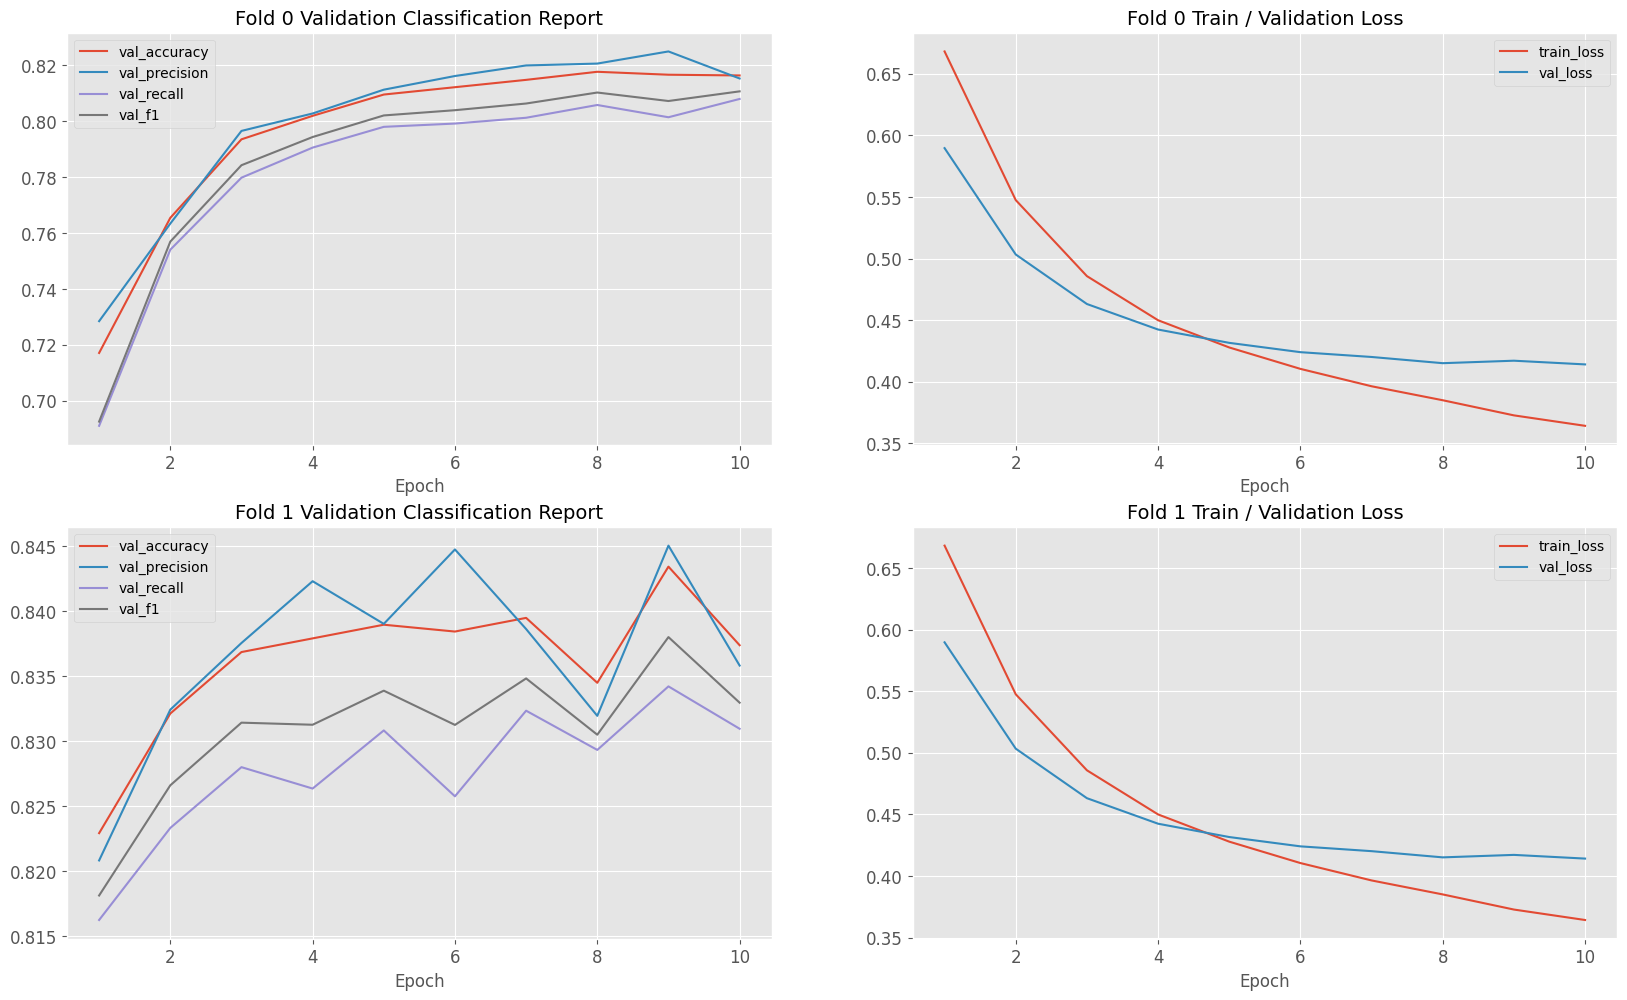

In [38]:
clf.plot_learning_curve()

In [39]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [40]:
test['clean_text'] = test['text'].apply(lambda x: clean_text(x))


In [41]:
new_test = test[['clean_text']].copy()

In [42]:
y_pred = clf.predict(new_test)

In [45]:
submission = pd.read_csv(path2)
submission['target'] = np.round(y_pred).astype('int')
submission.to_csv('submission.csv', index= False)
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [46]:
submission.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.408520
std,3146.427221,0.491635
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000
